In [1]:
# pyrates imports
from pyrates.frontend import CircuitTemplate
from pyrates.backend import ComputeGraph
from pyrates.utility import plot_timeseries

# additional imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 28
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['legend.fontsize'] = 20
from copy import deepcopy
from seaborn import cubehelix_palette

%matplotlib inline

Replication of Bifurcations under Extrinsic Forcing
==========================================

In [2]:
# parameter definition
dt = 1e-3
T = 42.
inp = np.zeros((int(T/dt), 1))
inp[int(6./dt):int((T-12.)/dt)] = 3.

In [3]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net1").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, inputs={("Pop1.0", "Op_e.0", "inp"): inp},
                           outputs={"r": ("Pop1.0", "Op_e.0", "r"),
                                    "v": ("Pop1.0", "Op_e.0", "v")})

# add input to results data frame
result['input'] = inp[:, 0]

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 3.3855438232421875e-05 seconds.


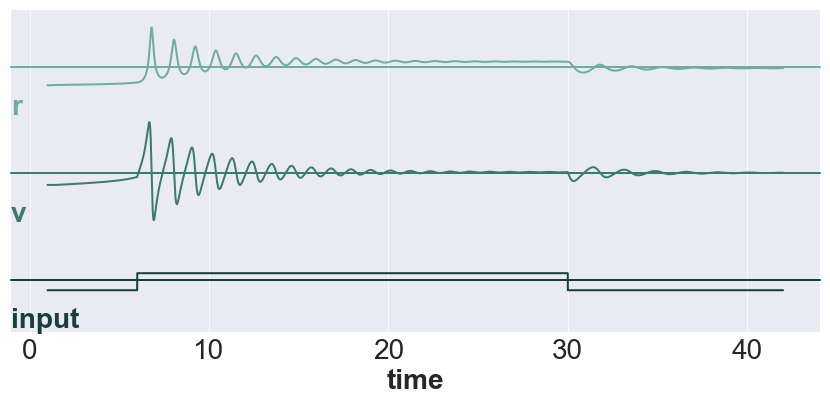

In [4]:
# plotting
result = result.iloc[result.index >1.0, :]
cm = cubehelix_palette(n_colors=3, start=2.5, rot=-0.1, light=0.6, dark=0.2)
plot_timeseries(result, plot_style='ridge_plot', demean=True, hspace=-.01, fontsize=28, aspect=6, height=2.0, cmap=cm)
#plt.savefig('PyRates_Montbrio_example_1.svg', format='svg')

In [29]:
T = 82.
inp = np.zeros((int(T/dt), 1))
inp[int(4./dt):, 0] = 3. * np.sin(np.pi/20. * np.arange(4., T, dt))

82.0s of backend behavior were simulated in 14.173929452896118 s given a simulation resolution of 0.001 s.


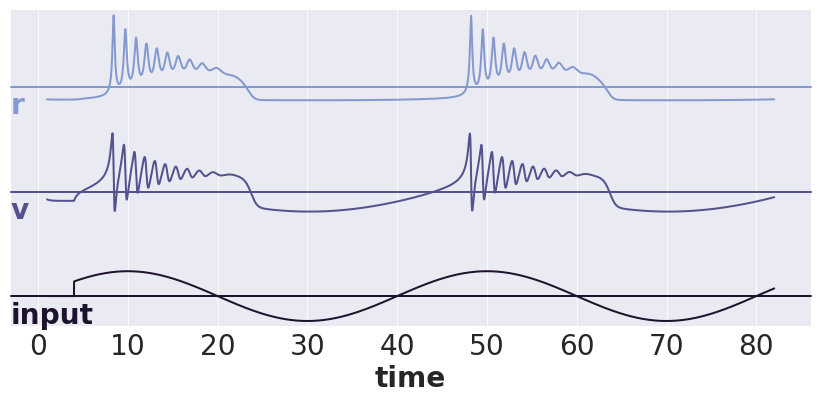

In [30]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net1").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, inputs={("Pop1.0", "Op_e.0", "inp"): inp},
                           outputs={"r": ("Pop1.0", "Op_e.0", "r"),
                                    "v": ("Pop1.0", "Op_e.0", "v")})

In [ ]:
# plotting
result['input'] = inp[:, 0]
result = result.iloc[result.index >1.0, :]
cm = cubehelix_palette(n_colors=3, as_cmap=True, start=-2.0, rot=-0.1)
plot_timeseries(result, plot_style='ridge_plot', demean=True, hspace=-.01, fontsize=28, aspect=6, height=2.0, cmap=cm)
#plt.savefig('PyRates_Montbrio_example_2.svg', format='svg')

Investigation of Inhibitory Population Dynamics (J < 0)
=============================================

In [2]:
# parameter definition
dt = 1e-3
T = 42.
inp = np.zeros((int(T/dt), 1))
inp[int(6./dt):int((T-12.)/dt)] = 6.

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 3.910064697265625e-05 seconds.


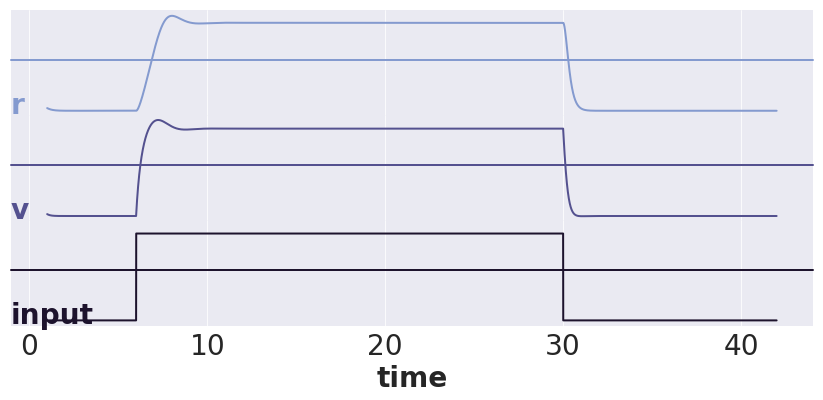

In [3]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net2").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, inputs={("Pop1.0", "Op_i.0", "inp"): inp},
                            outputs={"r": ("Pop1.0", "Op_i.0", "r"),
                                     "v": ("Pop1.0", "Op_i.0", "v")})

# plotting
result['input'] = inp[:, 0]
result = result.iloc[result.index >1.0, :]
plot_timeseries(result, plot_style='ridge_plot', demean=True, light=0.6, dark=0.1, hue=.95, n_colors=3, hspace=-.01,
                fontsize=28, start=-2.8, rot=-0.2, aspect=6, height=2.0)

In [6]:
T = 82.
inp = np.zeros((int(T/dt), 1))
inp[int(4./dt):, 0] = 3. * np.sin(np.pi/20. * np.arange(4., T, dt))

start of vectorization
...finished after 4.57763671875e-05 seconds.


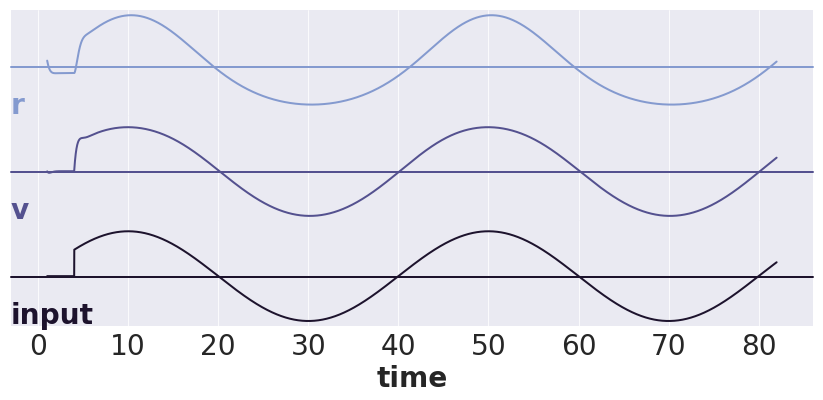

In [8]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net2").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, inputs={("Pop1.0", "OP_i.0", "inp"): inp},
                           outputs={"r": ("Pop1.0", "OP_i.0", "r"),
                                    "v": ("Pop1.0", "OP_i.0", "v")})

# plotting
result['input'] = inp[:, 0]
result = result.iloc[result.index >1.0, :]
plot_timeseries(result, plot_style='ridge_plot', demean=True, light=0.6, dark=0.1, hue=.95, n_colors=3, hspace=-.01,
                fontsize=28, start=-2.8, rot=-0.2, aspect=6, height=2.0)

Investigation of synapse effects
==========================

In [2]:
# parameter definition
dt = 1e-3
T = 42.
inp1 = np.zeros((int(T/dt), 1))
inp1[int(6./dt):int((T-20.)/dt)] = 3.
#inp2 = np.zeros((int(T/dt), 1))
#inp2[int(4./dt):, 0] = 1. * np.sin(np.pi/20. * np.arange(4., T, dt))

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 2.6702880859375e-05 seconds.


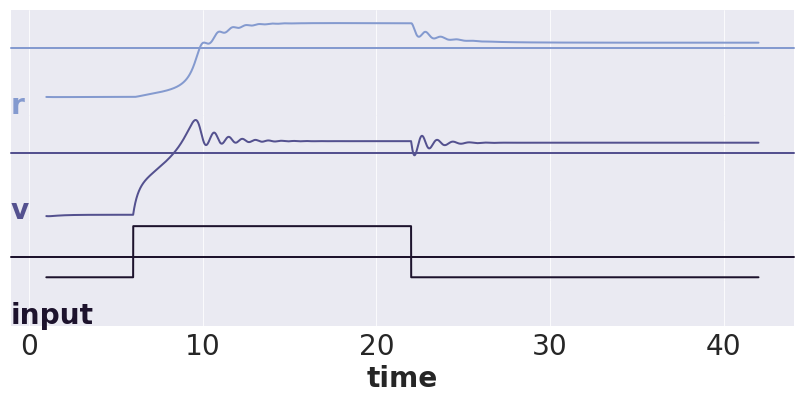

In [3]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net3").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, 
                           inputs={("Pop1.0", "Op_tau_e.0", "inp"): inp1},
                           outputs={"r": ("Pop1.0", "Op_tau_e.0", "r"),
                                    "v": ("Pop1.0", "Op_tau_e.0", "v")})

# plotting
result['input'] = inp1[:, 0]
#result['input2'] = inp2[:, 0]
result = result.iloc[result.index >1.0, :]
plot_timeseries(result, plot_style='ridge_plot', demean=True, light=0.6, dark=0.1, hue=.95, n_colors=3, hspace=-.01,
                fontsize=28, start=-2.8, rot=-0.2, aspect=6, height=2.0)

Investigation of coupling effects
===========================

In [2]:
# parameter definition
dt = 1e-3
T = 42.
inp = np.zeros((int(T/dt), 1))
inp[int(6./dt):int((T-12.)/dt)] = 3.

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 5.412101745605469e-05 seconds.


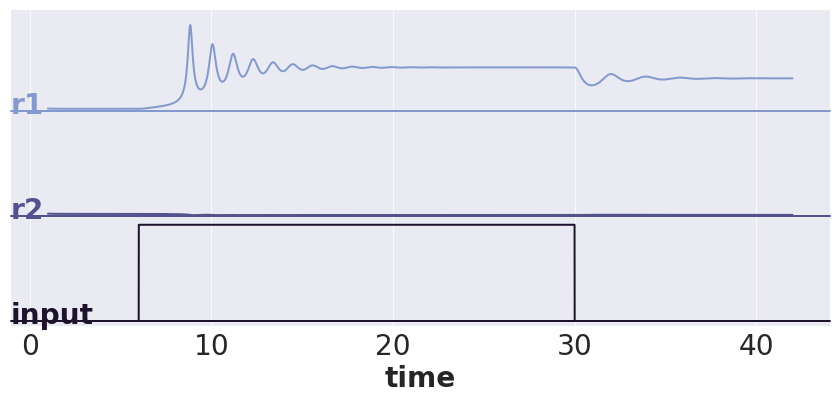

In [3]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net4").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, inputs={("Pop1.0", "Op_tau_e.0", "inp"): inp},
                            outputs={"r1": ("Pop1.0", "Op_tau_e.0", "r"),
                                     "r2": ("Pop2.0", "Op_tau_e.0", "r")})

# plotting
result['input'] = inp[:, 0]
result = result.iloc[result.index >1.0, :]
plot_timeseries(result, plot_style='ridge_plot', demean=False, light=0.6, dark=0.1, hue=.95, n_colors=3, hspace=-.01,
                fontsize=28, start=-2.8, rot=-0.2, aspect=6, height=2.0)

In [2]:
# parameter definition
dt = 1e-3
T = 32.
inp = np.zeros((int(T/dt), 1))
inp[int(6./dt):int(20./dt)] = 4.

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 5.6743621826171875e-05 seconds.


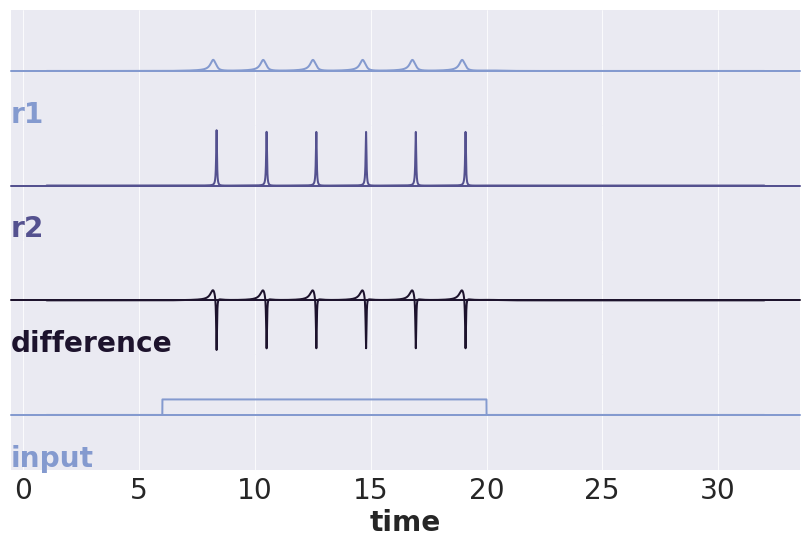

In [3]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net5").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, inputs={("Pop1.0", "Op_tau_e.0", "inp"): inp},
                            outputs={"r1": ("Pop1.0", "Op_tau_e.0", "r"),
                                     "r2": ("Pop2.0", "Op_tau_i.0", "r")})

# plotting
result['difference'] = result.iloc[:, 0] - result.iloc[:, 1]
result['input'] = inp[:, 0]
result = result.iloc[result.index >1.0, :]
plot_timeseries(result, plot_style='ridge_plot', demean=False, light=0.6, dark=0.1, hue=.95, n_colors=3, hspace=-.01,
                fontsize=28, start=-2.8, rot=-0.2, aspect=6, height=2.0)

In [2]:
# parameter definition
dt = 1e-4
T = 2.
inp = np.random.randn(int(T/dt), 2) * 2.0

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 0.0023250579833984375 seconds.


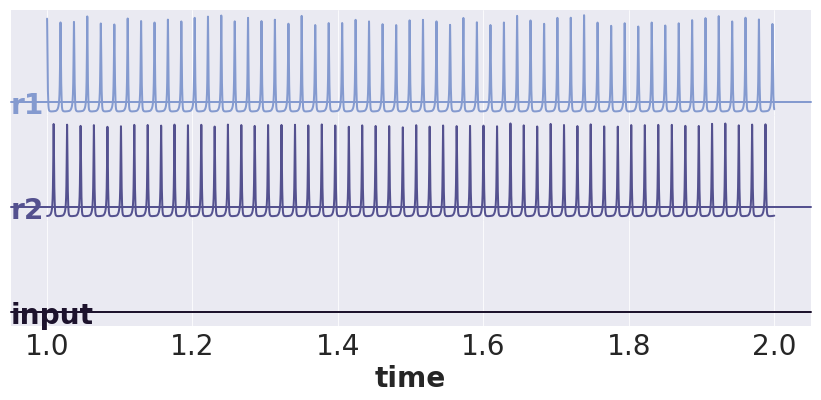

In [3]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net6").apply()
compute_graph = ComputeGraph(circuit, vectorization="nodes", dt=dt)
result = compute_graph.run(T, inputs={("PC", "Op_e.0", "inp"): inp},
                            outputs={"r1": ("PC1.0", "Op_e.0", "r"),
                                     "r2": ("PC2.0", "Op_e.0", "r")})

# plotting
result['input'] = inp[:, 0]
result = result.iloc[result.index >1.0, :]
plot_timeseries(result, plot_style='ridge_plot', demean=True, light=0.6, dark=0.1, hue=.95, n_colors=3, hspace=-.01,
                fontsize=28, start=-2.8, rot=-0.2, aspect=6, height=2.0)

investigation of time-scale dependencies
==================================

In [6]:
dt = 1e-3
T = 42.
taus = np.array([0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 1., 1., 1., 1., 10., 10., 10., 10.])
taus2 = np.array([0.01, 0.1, 1., 10., 0.01, 0.1, 1., 10., 0.01, 0.1, 1., 10., 0.01, 0.1, 1., 10.])
params = {'Pop1.0/Op_tau_e.0/tau': taus, 'Pop1.0/Op_tau_e.0/tau_syn': taus2}
inp1 = np.zeros((int(T/dt), 1))
inp1[int(6./dt):int((T-12.)/dt)] = 3.

In [7]:
# pyrates simulation
results = grid_search("pyrates.examples.simple_nextgen_NMM.Net3", params, T,
                      inputs={("Pop", "Op_tau_e.0", "inp"): inp1},
                      outputs={"v": ("all", "Op_tau_e.0", "v")},
                      dt=dt)

# plotting
df = DataFrame()
for r, t1, t2 in zip(results['v'], taus, taus2):
    df[f't1/t2={t1}/{t2}'] = r.iloc[r.index > 1.0]
plot_timeseries(df, plot_style='ridge_plot', demean=True, light=0.6, dark=0.3, hue=.95,
                n_colors=6, hspace=-.01, fontsize=28, start=-3.0, rot=-0.2, aspect=20, height=2.0)

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 0.011960506439208984 seconds.


NameError: name 'iloc' is not defined

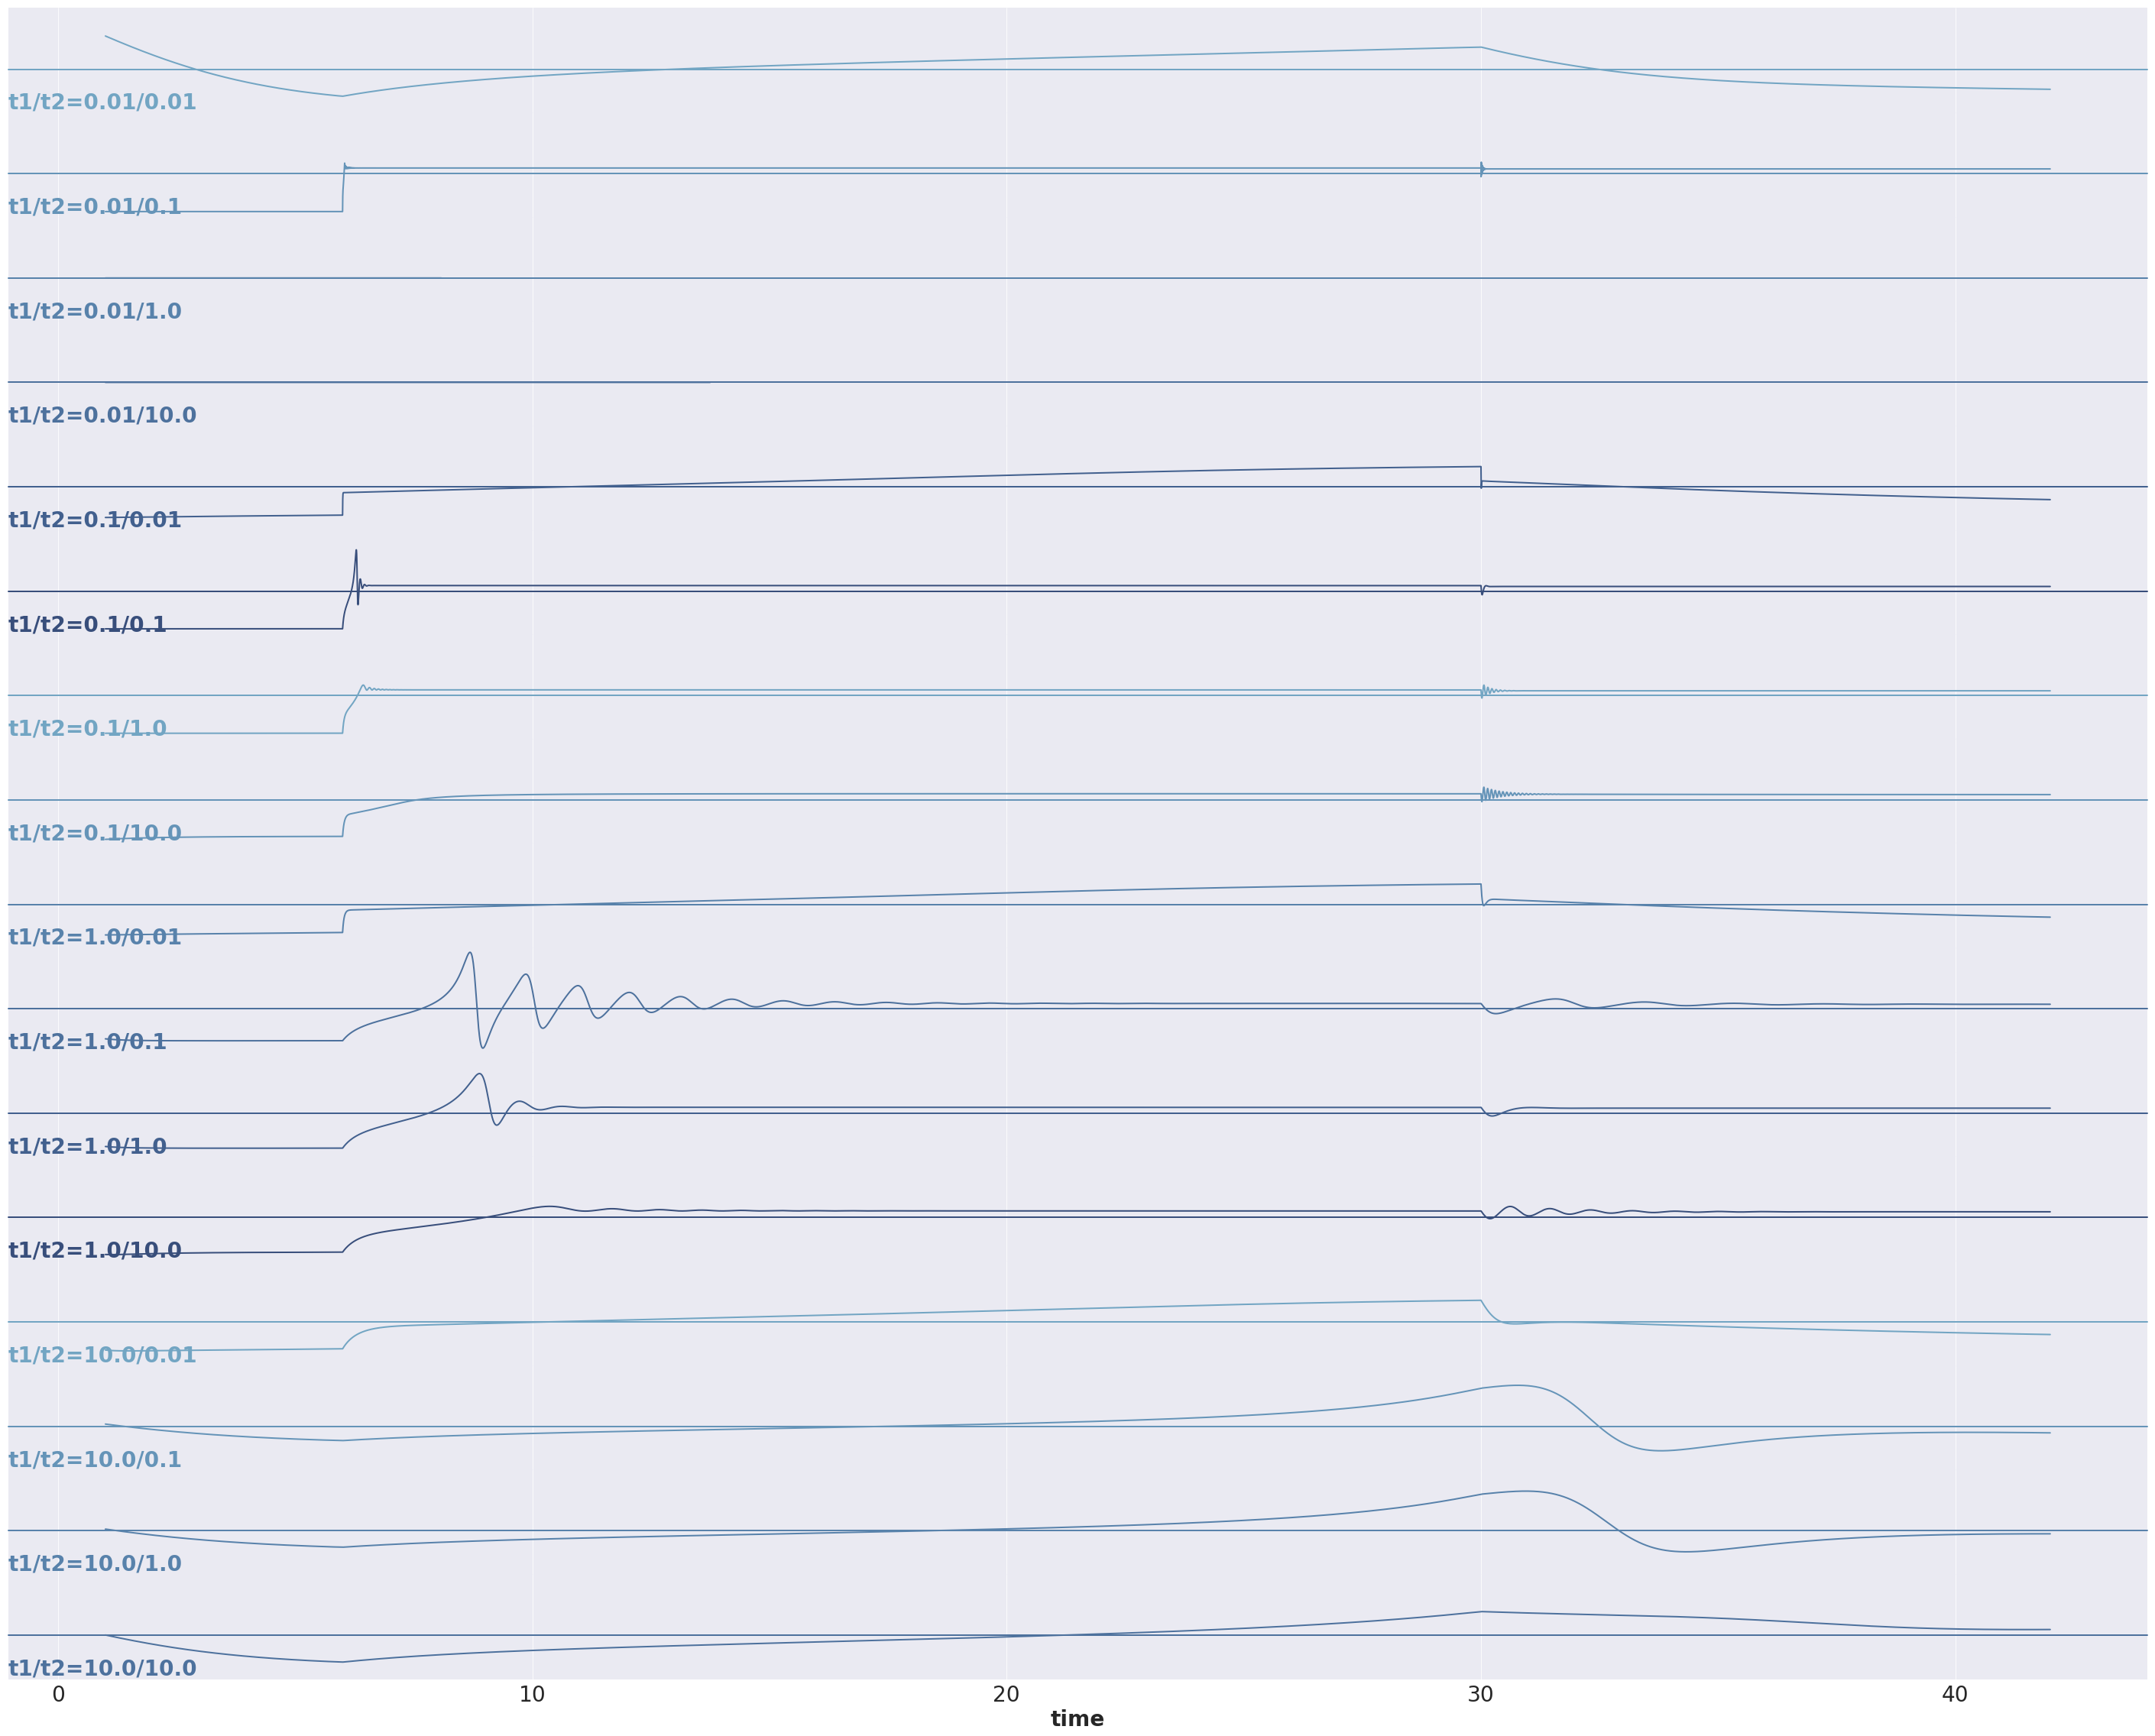

In [9]:
# plotting
df = DataFrame()
for r, t1, t2 in zip(results['v'], taus, taus2):
    df[f't1/t2={t1}/{t2}'] = results['v'][r].iloc[results['v'][r].index > 1.0]
plot_timeseries(df, plot_style='ridge_plot', demean=True, light=0.6, dark=0.3, hue=.95,
                n_colors=6, hspace=-.01, fontsize=28, start=-3.0, rot=-0.2, aspect=20, height=2.0)

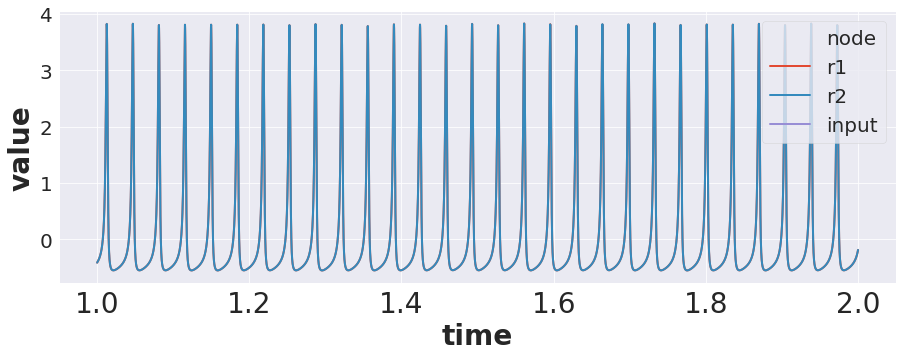

In [5]:
fig, axes = plt.subplots(figsize=(15,5))
plot_timeseries(result, ax=axes)